# Lab_5 TCV3151 Computer Vision
Bagja 9102 Kurniawan <br> **1211501345**

## Preparatory Work

In [1]:
#Mount Google Drive.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Import the packages.
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Implementing Canny Edge Detector

(<matplotlib.image.AxesImage at 0x7fc028156dd0>, (-0.5, 538.5, 437.5, -0.5))

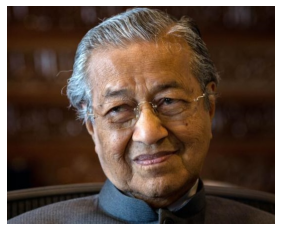

In [3]:
#Read the image ‘mahathir.jpg’.
path = '/content/gdrive/My Drive/TCV3151/Lab_5/'
 
img = cv2.imread(path+'mahathir.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fc026c2d3d0>, (-0.5, 538.5, 437.5, -0.5))

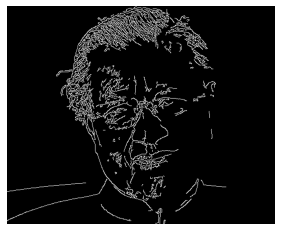

In [4]:
#Convert the image to grayscale and apply Canny edge detector.
img = img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,100,200)
plt.imshow(edges, cmap='gray'), plt.axis('off')

## Question 2: Implementing Sobel Operator

(<matplotlib.image.AxesImage at 0x7fc026c09790>, (-0.5, 1023.5, 575.5, -0.5))

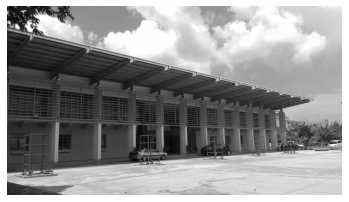

In [5]:
#Read the image ‘president_square.jpg’.
img = cv2.imread(path+'president_square.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fc026b5ee10>, (-0.5, 1023.5, 575.5, -0.5))

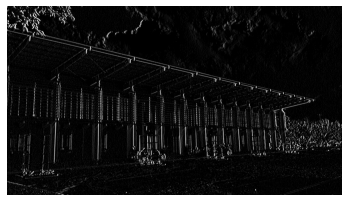

In [6]:
#Use the Sobel operator to find horizontal edges.
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0)
plt.imshow(sobelx, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fc026acc750>, (-0.5, 1023.5, 575.5, -0.5))

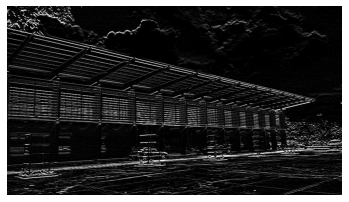

In [7]:
#Use the Sobel operator to find vertical edges.
sobely = cv2.Sobel(img,cv2.CV_8U,0,1)
plt.imshow(sobely, cmap='gray'), plt.axis('off')

## Question 3: Extracting Different Edge Directions

(<matplotlib.image.AxesImage at 0x7fc026aa4850>, (-0.5, 1023.5, 575.5, -0.5))

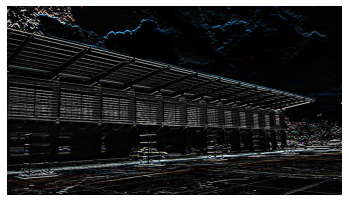

In [8]:
#Extract the edges at +45° , and -45° orientations.
img = cv2.imread(path+'president_square.jpg')
 
horizontal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  
 
ddepth = -1
sobelx = cv2.filter2D(img, ddepth, horizontal)
plt.imshow(sobelx, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fc026a7dcd0>, (-0.5, 1023.5, 575.5, -0.5))

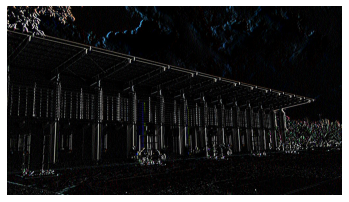

In [9]:
#Implement the vertical filters.
vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
sobely = cv2.filter2D(img, ddepth, vertical)
plt.imshow(sobely, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fc0269e1510>, (-0.5, 1023.5, 575.5, -0.5))

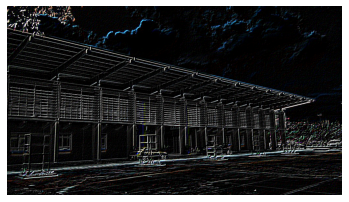

In [10]:
#Implement the rest of the filters.
w45 = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]])
sobelw45 = cv2.filter2D(img, ddepth, w45)
plt.imshow(sobelw45, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fc0269b6cd0>, (-0.5, 1023.5, 575.5, -0.5))

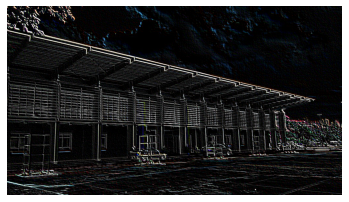

In [11]:
wm45 = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])
sobelwm45 = cv2.filter2D(img, ddepth, wm45)
plt.imshow(sobelwm45, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fc0269230d0>, (-0.5, 1023.5, 575.5, -0.5))

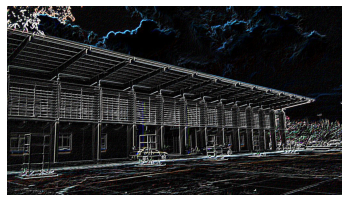

In [12]:
#Extract both the horizontal and vertical edges together.
sobel_all = cv2.add(sobelx, sobely)
plt.imshow(sobel_all, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fc0268f29d0>, (-0.5, 1023.5, 575.5, -0.5))

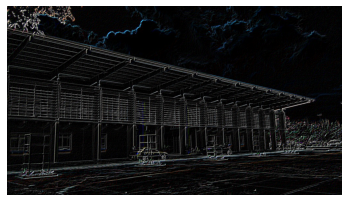

In [13]:
#Add weighs.
sobel_all = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
plt.imshow(sobel_all, cmap='gray'), plt.axis('off')

## Question 4: Application of Edge Detector for Image Sharpening

(<matplotlib.image.AxesImage at 0x7fc026857090>, (-0.5, 245.5, 245.5, -0.5))

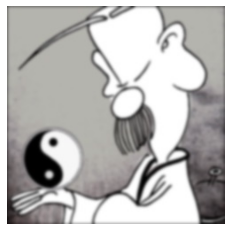

In [14]:
#Read the image ‘yinyang.jpg’.
img = cv2.imread(path+'yinyang.jpg')
plt.imshow(img), plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x7fc026994150>, (-0.5, 245.5, 245.5, -0.5))

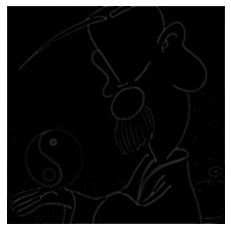

In [15]:
#Blur the image before applying Laplacian filter.
blur = cv2.blur(img,(5,5))
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
plt.imshow(laplacian, cmap='gray'), plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x7fc026807310>, (-0.5, 245.5, 245.5, -0.5))

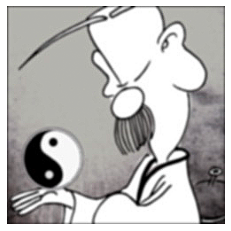

In [16]:
#Sharpen the image.
sharpened = img - laplacian
plt.imshow(sharpened, cmap='gray'), plt.axis('off')

## Question 5: Application of Edge Detector to Find People

(<matplotlib.image.AxesImage at 0x7fc02675d510>, (-0.5, 474.5, 633.5, -0.5))

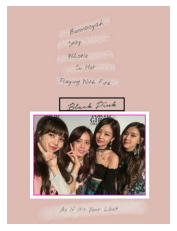

In [17]:
#Read the image ‘black_pink.jpg’.
img = cv2.imread(path + 'black_pink.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fc026733cd0>, (-0.5, 474.5, 633.5, -0.5))

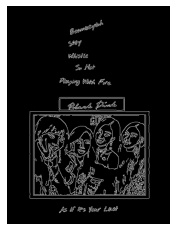

In [18]:
#Apply Canny edge detector.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert color from BGR to gray
edges = cv2.Canny(img,100,200) # Apply Canny edge detector with parameter of 100, 200
plt.imshow(edges, cmap='gray'), plt.axis('off')

In [19]:
#Find the largest contour.
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
 
largest_area=0
for i in contours:
    area = cv2.contourArea(i)
    
    if (area>largest_area):
        largest_area=area
        largest_contour_index=i
        x,y,w,h = cv2.boundingRect(largest_contour_index)

(<matplotlib.image.AxesImage at 0x7fc026696790>, (-0.5, 330.5, 238.5, -0.5))

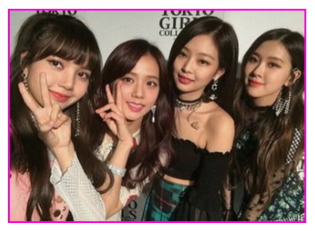

In [20]:
#Crop the ROI.
ROI=img[ x + h:y + h, x:y+(w-h) ]
plt.imshow(ROI), plt.axis('off')